In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


drop approval year, new exist, urbanrural

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import Ridge, RidgeClassifier, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import time
from sklearn.ensemble import RandomForestClassifier



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4210 final project/cleaned_dataset_with_dummies.csv')

In [ ]:
df.isna().sum()

,0
Loan_Term,0
Number_Of_Employees,0
Business_Type,0
Revolving_Line_Of_Credit,0
Low_Documentation_Loan_Program,0
Disbursement_Gross,0
Loan_Status,0
Urban_Rural_Status_1,0
Urban_Rural_Status_2,0
NAICS_US_Industry_Title_Administrative and Support and Waste Management and Remediation Services,0


In [ ]:
pd.set_option('display.max_columns', None)

Training Set Metrics (with class_weight='balanced'):
Accuracy: 0.8354
Precision: 0.9569
Recall: 0.8392
F1 Score: 0.8942

Test Set Metrics:
Accuracy: 0.8357
Precision: 0.9566
Recall: 0.8399
F1 Score: 0.8945


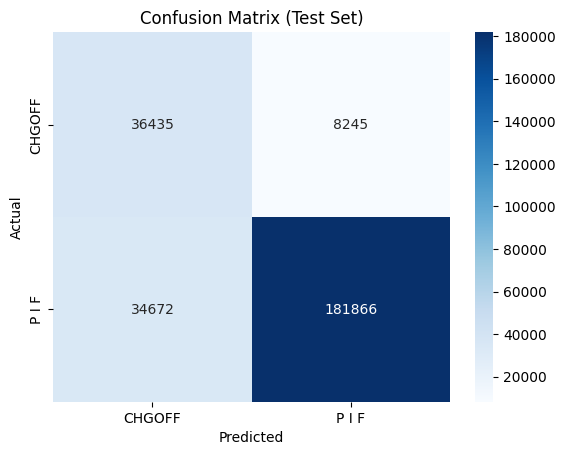

In [ ]:
#define features (X) and target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# normalize
scaler = StandardScaler()

# Fit on data and transform training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term',
                                                                                                    'Number_Of_Employees',
                                                                                                    'Disbursement_Gross']])
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term',
                                                                                              'Number_Of_Employees',
                                                                                              'Disbursement_Gross']])


# using class_weight='balanced' in RandomForestClassifier ---
#fit the Random Forest model with class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(random_state=42,
                                  class_weight='balanced',
                                  max_depth=10)
# Use class_weight for imbalance
rf_model.fit(X_train, y_train)

#make predictions for both original training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

#evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

#evaluate on training and test set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

print("Training Set Metrics (with class_weight='balanced'):")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')


cm_train = confusion_matrix(y_train, y_train_pred)
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

#confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

#confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

In [ ]:
print(df['Loan_Status'].value_counts())
print(df['Loan_Status'].value_counts(normalize=True))

Loan_Status
1    721678
0    149046
Name: count, dtype: int64
Loan_Status
1    0.828825
0    0.171175
Name: proportion, dtype: float64


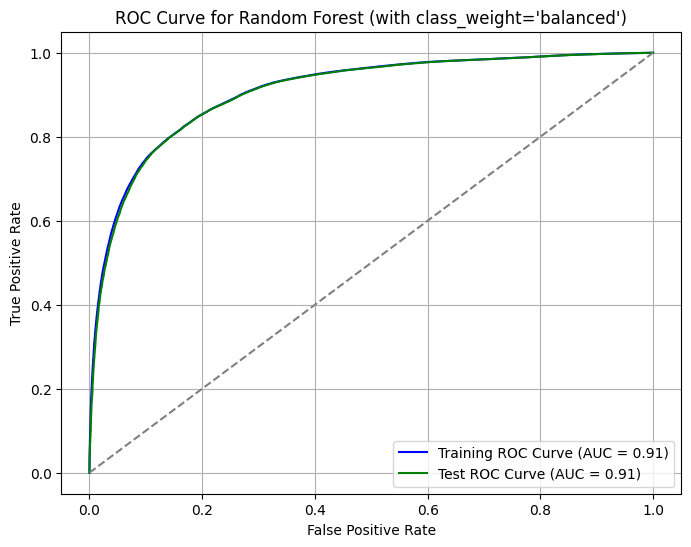

In [ ]:
# Get the predicted probabilities for the positive class (1) for both original training and test sets
# Note: For Random Forest, use the new model object name 'rf_model'
train_probs = rf_model.predict_proba(X_train)[:, 1] # Predict on original X_train
test_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for original training data
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
train_auc = auc(train_fpr, train_tpr)

# Compute ROC curve and AUC for test data
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)
test_auc = auc(test_fpr, test_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'Training ROC Curve (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='green', label=f'Test ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guess

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (with class_weight=\'balanced\')') # Updated title
plt.legend(loc='lower right')
plt.grid()
plt.show()